In [1]:
from quchem.Graph import *

In [2]:
from quchem.Hamiltonian_Generator_Functions import *


### Parameters
Molecule = 'H2'
geometry = [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
num_shots = 10000
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')

In [3]:
QubitHamiltonianFrozen = tuple(frozenset((PauliStr, const) for op in QubitHamiltonian \
                                              for PauliStr, const in op.terms.items()))

## OpenFermion_Commutativity

In [4]:
from openfermion.ops import QubitOperator
Op1 = QubitOperator('Y0 X1 X2 X3', 0.5)
frozen_Op1 = tuple(*frozenset((PauliStr, const) for PauliStr, const in Op1.terms.items()))


Op2 = QubitOperator('Y0 X1 X2 Z3', 0.25j)
frozen_Op2 = tuple(*frozenset((PauliStr, const) for PauliStr, const in Op1.terms.items()))

comm_status = 'C'

OpenFermion_Commutativity(frozen_Op1, frozen_Op2, comm_status)

True

## Openfermion_Build_Graph_Nodes

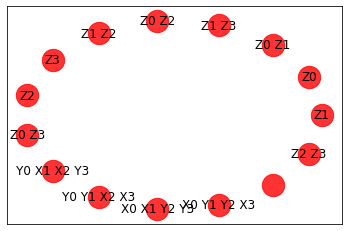

In [5]:
G = nx.Graph()

G = Openfermion_Build_Graph_Nodes(QubitHamiltonianFrozen, G, plot_graph=True)

## Openfermion_Build_Graph_Edges_COMMUTING_QWC_AntiCommuting

Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 1895.76it/s]
/home/lex/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


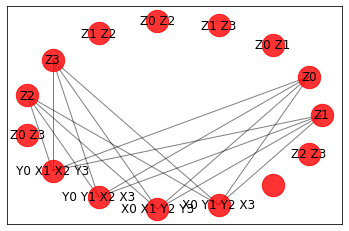

In [6]:
G = Openfermion_Build_Graph_Nodes(QubitHamiltonianFrozen, G, plot_graph=False)

commutativity_flag = 'AC'

G = Openfermion_Build_Graph_Edges_COMMUTING_QWC_AntiCommuting(G, QubitHamiltonianFrozen,
                                                                               commutativity_flag, plot_graph = True)

## Openfermion_Get_Complemenary_Graph

Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 2052.74it/s]


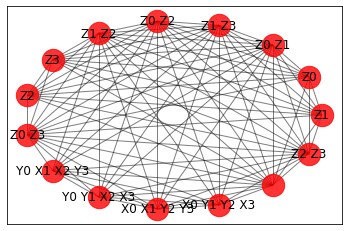

In [7]:
commutativity_flag = 'AC'
G=nx.Graph()
G = Openfermion_Build_Graph_Nodes(QubitHamiltonianFrozen, G, plot_graph=False)
G = Openfermion_Build_Graph_Edges_COMMUTING_QWC_AntiCommuting(G, QubitHamiltonianFrozen, commutativity_flag, plot_graph = False) 

G_comp = Openfermion_Get_Complemenary_Graph(G, plot_graph=True)

Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 1775.54it/s]


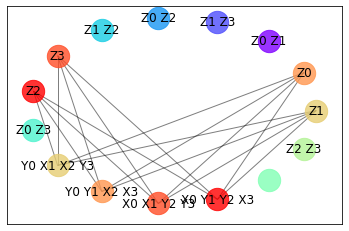

{0: [(((0, 'Z'), (1, 'Z')), (0.1686889816869329+0j))],
 1: [(((1, 'Z'), (3, 'Z')), (0.12062523481381837+0j))],
 2: [(((0, 'Z'), (2, 'Z')), (0.12062523481381837+0j))],
 3: [(((1, 'Z'), (2, 'Z')), (0.16592785032250768+0j))],
 4: [(((0, 'Z'), (3, 'Z')), (0.16592785032250768+0j))],
 5: [((), (-0.09706626861762624+0j))],
 6: [(((2, 'Z'), (3, 'Z')), (0.174412876106516+0j))],
 7: [(((1, 'Z'),), (0.171412826394024+0j)),
  (((0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y')), (0.04530261550868928+0j))],
 8: [(((0, 'Z'),), (0.17141282639402405+0j)),
  (((0, 'Y'), (1, 'Y'), (2, 'X'), (3, 'X')), (-0.04530261550868928+0j))],
 9: [(((3, 'Z'),), (-0.2234315367466397+0j)),
  (((0, 'X'), (1, 'X'), (2, 'Y'), (3, 'Y')), (-0.04530261550868928+0j))],
 10: [(((2, 'Z'),), (-0.2234315367466397+0j)),
  (((0, 'X'), (1, 'Y'), (2, 'Y'), (3, 'X')), (0.04530261550868928+0j))]}

In [8]:
commutativity_flag = 'AC'
G=nx.Graph()
G = Openfermion_Build_Graph_Nodes(QubitHamiltonianFrozen, G, plot_graph=False)
G = Openfermion_Build_Graph_Edges_COMMUTING_QWC_AntiCommuting(G, QubitHamiltonianFrozen, commutativity_flag, plot_graph = False) 


clique = Openfermion_Get_clique_cover(G, strategy='largest_first', plot_graph=True)
clique

## Get clique cover of qubit op

In [9]:
Convert_Clique_Cover_to_QubitOp(clique)

{0: [(0.1686889816869329+0j) [Z0 Z1]],
 1: [(0.12062523481381837+0j) [Z1 Z3]],
 2: [(0.12062523481381837+0j) [Z0 Z2]],
 3: [(0.16592785032250768+0j) [Z1 Z2]],
 4: [(0.16592785032250768+0j) [Z0 Z3]],
 5: [(-0.09706626861762624+0j) []],
 6: [(0.174412876106516+0j) [Z2 Z3]],
 7: [(0.171412826394024+0j) [Z1], (0.04530261550868928+0j) [Y0 X1 X2 Y3]],
 8: [(0.17141282639402405+0j) [Z0], (-0.04530261550868928+0j) [Y0 Y1 X2 X3]],
 9: [(-0.2234315367466397+0j) [Z3], (-0.04530261550868928+0j) [X0 X1 Y2 Y3]],
 10: [(-0.2234315367466397+0j) [Z2], (0.04530261550868928+0j) [X0 Y1 Y2 X3]]}

## Get clique cover of qubit op as strings

In [10]:
Convert_Clique_Cover_to_str(clique)

{0: [('Z0 Z1', (0.1686889816869329+0j))],
 1: [('Z1 Z3', (0.12062523481381837+0j))],
 2: [('Z0 Z2', (0.12062523481381837+0j))],
 3: [('Z1 Z2', (0.16592785032250768+0j))],
 4: [('Z0 Z3', (0.16592785032250768+0j))],
 5: [('', (-0.09706626861762624+0j))],
 6: [('Z2 Z3', (0.174412876106516+0j))],
 7: [('Z1', (0.171412826394024+0j)),
  ('Y0 X1 X2 Y3', (0.04530261550868928+0j))],
 8: [('Z0', (0.17141282639402405+0j)),
  ('Y0 Y1 X2 X3', (-0.04530261550868928+0j))],
 9: [('Z3', (-0.2234315367466397+0j)),
  ('X0 X1 Y2 Y3', (-0.04530261550868928+0j))],
 10: [('Z2', (-0.2234315367466397+0j)),
  ('X0 Y1 Y2 X3', (0.04530261550868928+0j))]}

# Class method

In [11]:
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

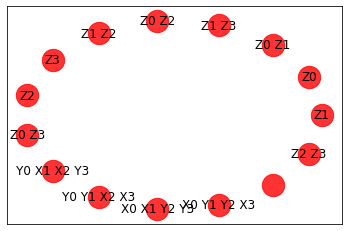

Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 1922.88it/s]


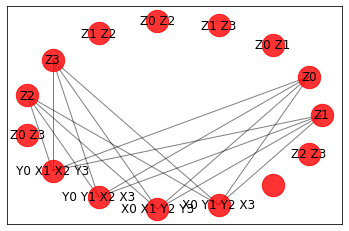

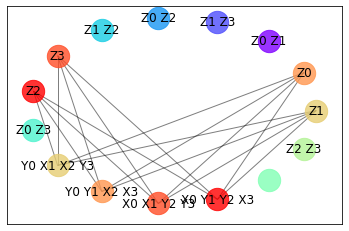

In [12]:
commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = True
Graph_colouring_strategy='largest_first'

set_defined_by_comm_flag = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)

# Looking at relationships between these sets!

In [13]:
from quchem.Hamiltonian_Generator_Functions import *


### HAMILTONIAN start
Molecule = 'LiH'
geometry = [('Li', (0., 0., 0.)), ('H', (0., 0., 1.45))]
num_shots = 10000
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
### HAMILTONIAN end

### GRAPH start
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'

set_defined_by_comm_flag = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)

Building Graph Edges: 100%|##########| 631/631 [00:16<00:00, 37.28it/s] 


## Graph_of_two_sets

Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 492.64it/s]

['X2 Z3 Z4 Z5 Z7 Z8 Z9 X10', 'Z2 Z7', 'X2 Z3 X4 Z9', 'Y0 Z1 Y2 Z7']

['Z0', 'Y0 Z1 Z2 Z3 Y4', 'Y0 Z1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Y10', 'Y0 Z1 Y2', 'Y0 X1 X6 Y7', 'Y0 Z1 Z2 Z3 Z4 X5 X8 Y9', 'Y0 Z1 Z2 Z3 Z4 Z5 Y6 X7 Z8 Z9 Z10 X11', 'Y0 Z1 Z2 X3 X8 Y9']





/home/lex/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


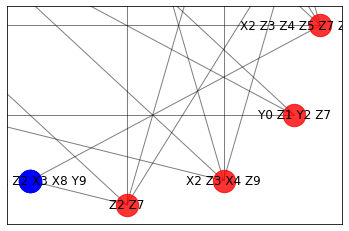

(<networkx.classes.graph.Graph at 0x7ff3a9d9ad50>, False)

In [15]:
anti_comm_QWC = 'C'
plot_graph = True

i=20
j=15
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[i] ])
print('')
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[j] ])

print('')
print('')
Graph_of_two_sets_CONNECTED(set_defined_by_comm_flag[i], set_defined_by_comm_flag[j], anti_comm_QWC, plot_graph=plot_graph)

##

## Get all subgraphs

Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1198.09it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 2247.15it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1059.70it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1153.15it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 3534.19it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1523.06it/s]


Building Graph Edges: 100%|##########| 12/12 [00:00<00:00, 1631.44it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1288.77it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1212.23it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 2012.98it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1278.91it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1227.03it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1593.28it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1176.03it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1751.80it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1138.74it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 2234.10it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 933.57it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1716.87it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1276.35it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1039.82it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 2353.44it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1531.77it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1176.61it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1557.34it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1316.07it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1261.35it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1037.89it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1285.02it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1541.03it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1166.46it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1324.29it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1746.17it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1157.73it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1258.10it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 1172.28it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1168.52it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 996.17it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1236.41it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1276.64it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1597.05it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1379.25it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 2166.48it/s]


Building Graph Edges: 100%|##########| 2/2 [00:00<00:00, 1834.78it/s]


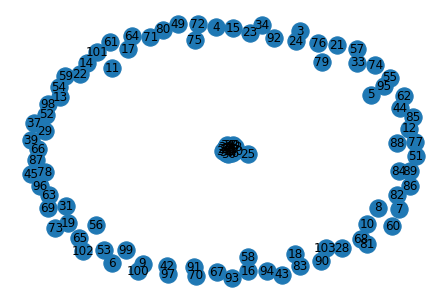

In [16]:
anti_comm_QWC='C'

GRAPH_key_nodes, single_nodes = Get_subgraph_of_sets(set_defined_by_comm_flag, anti_comm_QWC, plot_graph=True, plot_sub_graphs=False)

In [17]:
print(GRAPH_key_nodes.edges)

[(20, 25), (20, 30), (20, 35), (20, 36), (20, 38), (20, 40), (20, 46), (20, 48), (20, 50), (26, 30), (26, 35), (26, 36), (26, 38), (26, 40), (26, 46), (26, 48), (26, 50), (27, 30), (27, 35), (27, 36), (27, 38), (27, 40), (27, 46), (27, 48), (27, 50), (30, 32), (30, 41), (30, 47), (32, 35), (32, 36), (32, 38), (32, 40), (32, 46), (32, 48), (32, 50), (35, 41), (35, 47), (36, 41), (36, 47), (38, 41), (38, 47), (40, 41), (40, 47), (41, 46), (41, 48), (41, 50), (46, 47), (47, 48), (47, 50)]


In [18]:
taken_indices=[]
unqiue_terms =[]
for a,b in GRAPH_key_nodes.edges:
    if a not in taken_indices and b not in taken_indices:
        unqiue_terms.append((a,b))
        taken_indices.append(a)
        taken_indices.append(b)
print(len(unqiue_terms))
unqiue_terms

6


[(20, 25), (26, 30), (27, 35), (32, 36), (38, 41), (40, 47)]

Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1259.71it/s]

['X0 Z1 Y2 Y4 Z5 Z6 Z7 Z8 Z9 X10', 'X0 Z1 Z3 Z4 Z5 Z6 Z7 Z8 Z9 X10', 'Y0 Z1 Z2 Z3 Y4 Z10', 'Z0 X5 Z6 Z7 Z8 Z9 Z10 X11', 'Y0 X1 X2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Y11', 'Z0 Y3 Z4 Y5', 'Y0 X1 X2 Y3']

['Z2 Z4', 'Y0 Z1 Y2 Z10', 'Z0 X2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 X10', 'Y1 Y2 Y8 Y9', 'X2 Z3 Z4 Z5 Z6 Z7 X8 X9 Z10 X11', 'X2 Z3 Z4 Y5 Y6 X7']




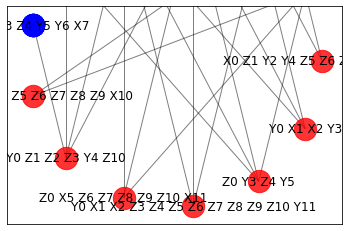

(<networkx.classes.graph.Graph at 0x7ff3a3fc4710>, False)

In [19]:
# can check using:

anti_comm_QWC = 'C'
plot_graph = True

i=71
j=72
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[i] ])
print('')
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[j] ])

print('')
print('')
Graph_of_two_sets_CONNECTED(set_defined_by_comm_flag[i], set_defined_by_comm_flag[j], anti_comm_QWC, plot_graph=plot_graph)

Building Graph Edges:   0%|          | 0/6 [00:00<?, ?it/s]

No of terms in Hamiltonian reduced from 631 to 105 (reduction=526)


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1740.38it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1655.10it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1287.93it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1928.97it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1121.88it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 987.82it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1603.10it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 2397.33it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 1300.60it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 3764.60it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1820.67it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1303.14it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 1735.89it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 1180.87it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1290.06it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1274.20it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1278.75it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1213.56it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1210.13it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1110.49it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1052.52it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1880.97it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1846.69it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1143.02it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1204.14it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 914.49it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1137.75it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1115.03it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1291.81it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1125.61it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1491.13it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 1140.72it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1149.44it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1107.81it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1115.27it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1079.15it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1342.61it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 3685.03it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1194.45it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 4310.69it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1822.29it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1532.17it/s]
/home/lex/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


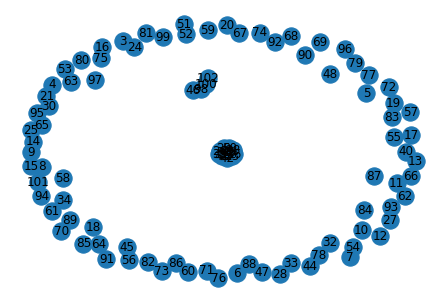

Number of completely commuting sets (non-unique) in reduced Hamiltonian:  57
Number of completely UNIQUE commuting sets in reduced Hamiltonian= 8
THESE can be measured SIMULTANEOUSLY
No of terms in reduced Hamiltonian reduced = 105 BUT only requires to 97 measurements


In [27]:
from quchem.Hamiltonian_Generator_Functions import *
### HAMILTONIAN start
Molecule = 'LiH'
geometry = [('Li', (0., 0., 0.)), ('H', (0., 0., 1.45))]
num_shots = 10000
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
### HAMILTONIAN end

#####################################
### GRAPH start
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'

set_defined_by_comm_flag = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)



print('No of terms in Hamiltonian reduced from {} to {} (reduction={})'.format(len(Hamiltonian_graph_obj.QubitHamiltonianFrozen),
                                                                               len(set_defined_by_comm_flag),
                                                                               len(Hamiltonian_graph_obj.QubitHamiltonianFrozen)- len(set_defined_by_comm_flag)))



sub_graph_relationship = 'C'

SubGraph_of_set_keys, keys_of_single_QubitOp = Get_subgraph_of_sets(set_defined_by_comm_flag, sub_graph_relationship, plot_graph=True)

print('Number of completely commuting sets (non-unique) in reduced Hamiltonian: ', len(SubGraph_of_set_keys.edges))
## note edges show sets that completely commute
# GG has nodes of all qubitOps in AC_set_dict_list with length greater than 1

## get clique cover of sub graph AKA UNIQUE sets:
coloured_sub_graph = Openfermion_Get_clique_cover(SubGraph_of_set_keys)
## coloured_sub_graph shows what we do in experiment! WITH the single ops too: keys_of_single_QubitOp!!!
# NOTE coloured_sub_graph only contains terms with more than one qubitOperator


print('Number of completely UNIQUE commuting sets in reduced Hamiltonian= {}'.format(len([coloured_sub_graph[key] for key in coloured_sub_graph if len(coloured_sub_graph[key]) >1])))
print('THESE can be measured SIMULTANEOUSLY')

# print('Number of anti_commuting_set reductions that can be done SIMULTANEOUSLY:',
#       (len(AC_set_dict_list) - len(keys_of_single_QubitOp)) - len(
#           coloured_sub_graph))


# note coloured_sub_graph only contains indices of terms with more than one qubitOp in it...
# hence minus keys_of_single_QubitOp

# print('overall no. terms to measure: ', len(coloured_sub_graph) + len(keys_of_single_QubitOp))

print('No of terms in reduced Hamiltonian reduced = {} BUT only requires to {} measurements'.format(
    len(set_defined_by_comm_flag),
    len(coloured_sub_graph) + len(keys_of_single_QubitOp)))

In [28]:
print('No of terms in Hamiltonian reduced from {} to {} (reduction={})'.format(len(Hamiltonian_graph_obj.QubitHamiltonianFrozen),
                                                                               len(set_defined_by_comm_flag),
                                                                               len(Hamiltonian_graph_obj.QubitHamiltonianFrozen)- len(set_defined_by_comm_flag)))

print('Number of completely commuting sets (non-unique) in reduced Hamiltonian: ', len(SubGraph_of_set_keys.edges))
      
print('Number of completely UNIQUE commuting sets in reduced Hamiltonian= {}'.format(len([coloured_sub_graph[key] for key in coloured_sub_graph if len(coloured_sub_graph[key]) >1])))
print('THESE can be measured SIMULTANEOUSLY')
      
print('No of terms in reduced Hamiltonian reduced = {} BUT only requires to {} measurements'.format(
    len(set_defined_by_comm_flag),
    len(coloured_sub_graph) + len(keys_of_single_QubitOp)))

No of terms in Hamiltonian reduced from 631 to 105 (reduction=526)
Number of completely commuting sets (non-unique) in reduced Hamiltonian:  57
Number of completely UNIQUE commuting sets in reduced Hamiltonian= 8
THESE can be measured SIMULTANEOUSLY
No of terms in reduced Hamiltonian reduced = 105 BUT only requires to 97 measurements


In [32]:
print('single terms')
print(keys_of_single_QubitOp)

print('each key gives keys of sets can be measured at same time!')
coloured_sub_graph

single terms
[0, 1, 2, 103, 104]
key defines which sets can be measured at same time!


{0: [3],
 1: [4],
 2: [5],
 3: [6],
 4: [7],
 5: [8],
 6: [9],
 7: [10],
 8: [11],
 9: [12],
 10: [13],
 11: [14],
 12: [15],
 13: [16],
 14: [17],
 15: [18],
 16: [19],
 17: [20],
 18: [21],
 19: [24],
 20: [25],
 21: [27],
 22: [28],
 23: [30],
 24: [32],
 25: [33],
 26: [34],
 27: [40],
 28: [44],
 29: [45],
 30: [47],
 31: [48],
 32: [51],
 33: [52],
 34: [53],
 35: [54],
 36: [55],
 37: [56],
 38: [57],
 39: [58],
 40: [59],
 41: [60],
 42: [61],
 43: [62],
 44: [63],
 45: [64],
 46: [65],
 47: [66],
 48: [67],
 49: [68],
 50: [69],
 51: [70],
 52: [71],
 53: [72],
 54: [73],
 55: [74],
 56: [75],
 57: [76],
 58: [77],
 59: [78],
 60: [79],
 61: [80],
 62: [81],
 63: [82],
 64: [83],
 65: [84],
 66: [85],
 67: [86],
 68: [87],
 69: [88],
 70: [89],
 71: [90],
 72: [91],
 73: [92],
 74: [93],
 75: [94],
 76: [95],
 77: [96],
 78: [97],
 79: [99],
 80: [101],
 81: [46, 98],
 82: [102, 100],
 83: [23, 22],
 84: [26, 31],
 85: [29, 35],
 86: [36, 37],
 87: [38, 43],
 88: [39, 49],
 89

In [30]:
taken_indices=[]
unqiue_terms =[]
for a,b in SubGraph_of_set_keys.edges:
    if a not in taken_indices and b not in taken_indices:
        unqiue_terms.append((a,b))
        taken_indices.append(a)
        taken_indices.append(b)
print(len(unqiue_terms))
unqiue_terms

8


[(22, 23),
 (26, 31),
 (29, 35),
 (36, 37),
 (38, 43),
 (39, 49),
 (46, 98),
 (100, 102)]

Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1763.98it/s]

['X3 Z4 X5 Z7', 'Y5 Z6 Z8 Z9 Z10 Y11', 'X1 Z2 Z3 Z4 X5 Z8', 'Z5 Z7']

['X0 Z1 Z2 Z3 Z4 Z5 Z7 Z8 Z9 X10', 'Z8 Z10', 'X4 Z5 Z6 Z7 Z8 X10', 'X2 Z3 Z4 Z5 Z7 Z8 Z9 X10']




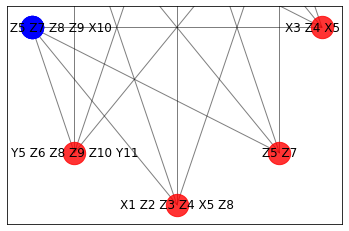

(<networkx.classes.graph.Graph at 0x7ff3a2983e90>, True)

In [31]:
# can check using:

anti_comm_QWC = 'C'
plot_graph = True

i=22
j=23
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[i] ])
print('')
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[j] ])

print('')
print('')
Graph_of_two_sets_CONNECTED(set_defined_by_comm_flag[i], set_defined_by_comm_flag[j], anti_comm_QWC, plot_graph=plot_graph)

Building Graph Edges: 100%|##########| 2/2 [00:00<00:00, 3269.14it/s]

No of terms in Hamiltonian reduced from 15 to 11 (reduction=4)


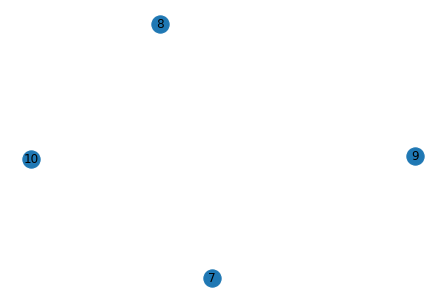

Number of completely commuting sets (non-unique) in reduced Hamiltonian:  0
Number of completely UNIQUE commuting sets in reduced Hamiltonian= 0
THESE can be measured SIMULTANEOUSLY
No of terms in reduced Hamiltonian reduced = 11 BUT only requires to 11 measurements

key defines which sets can be measured at same time! {0: [7], 1: [8], 2: [9], 3: [10]}


In [24]:
from quchem.Hamiltonian_Generator_Functions import *
### HAMILTONIAN start
Molecule = 'H2'
geometry = [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
num_shots = 10000
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
### HAMILTONIAN end

#####################################
### GRAPH start
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'

set_defined_by_comm_flag = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)



print('No of terms in Hamiltonian reduced from {} to {} (reduction={})'.format(len(Hamiltonian_graph_obj.QubitHamiltonianFrozen),
                                                                               len(set_defined_by_comm_flag),
                                                                               len(Hamiltonian_graph_obj.QubitHamiltonianFrozen)- len(set_defined_by_comm_flag)))



sub_graph_relationship = 'C'

SubGraph_of_set_keys, keys_of_single_QubitOp = Get_subgraph_of_sets(set_defined_by_comm_flag, sub_graph_relationship, plot_graph=True)

print('Number of completely commuting sets (non-unique) in reduced Hamiltonian: ', len(SubGraph_of_set_keys.edges))
## note edges show sets that completely commute
# GG has nodes of all qubitOps in AC_set_dict_list with length greater than 1

## get clique cover of sub graph AKA UNIQUE sets:
coloured_sub_graph = Openfermion_Get_clique_cover(SubGraph_of_set_keys)
## coloured_sub_graph shows what we do in experiment! WITH the single ops too: keys_of_single_QubitOp!!!
# NOTE coloured_sub_graph only contains terms with more than one qubitOperator


print('Number of completely UNIQUE commuting sets in reduced Hamiltonian= {}'.format(len([coloured_sub_graph[key] for key in coloured_sub_graph if len(coloured_sub_graph[key]) >1])))
print('THESE can be measured SIMULTANEOUSLY')

# print('Number of anti_commuting_set reductions that can be done SIMULTANEOUSLY:',
#       (len(AC_set_dict_list) - len(keys_of_single_QubitOp)) - len(
#           coloured_sub_graph))


# note coloured_sub_graph only contains indices of terms with more than one qubitOp in it...
# hence minus keys_of_single_QubitOp

# print('overall no. terms to measure: ', len(coloured_sub_graph) + len(keys_of_single_QubitOp))

print('No of terms in reduced Hamiltonian reduced = {} BUT only requires to {} measurements'.format(
    len(set_defined_by_comm_flag),
    len(coloured_sub_graph) + len(keys_of_single_QubitOp)))

print('')
print('key defines which sets can be measured at same time!', coloured_sub_graph)

In [25]:
taken_indices=[]
unqiue_terms =[]
for a,b in SubGraph_of_set_keys.edges:
    if a not in taken_indices and b not in taken_indices:
        unqiue_terms.append((a,b))
        taken_indices.append(a)
        taken_indices.append(b)
print(len(unqiue_terms))
unqiue_terms

0


[]